In [3]:
import matplotlib.colors as mcolors
import pandas as pd
from google.colab import drive
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 한글폰트 설치

In [4]:
# 나눔바른고딕 글꼴 파일 경로 지정
current_directory = "/content/drive/MyDrive/Colab Notebooks"
font_path = os.path.join(current_directory, "NanumBarunGothic.ttf")

#글꼴이 있는지 확인
if os.path.exists(font_path):
    #폰트 추가
    fm.fontManager.addfont(font_path)

    # 캐시를 새로 고치지 않고 직접 폰트 설정
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 출력 설정

# 1. 데이터 불러오기 및 데이터 확인

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KOREA IT/m3_분석라이브러리/crawling/Interpark_books_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23899 entries, 0 to 23898
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Publisher  23899 non-null  object
 1   Category   23899 non-null  object
 2   Title      23899 non-null  object
 3   Sales      23899 non-null  object
 4   Year       23899 non-null  int64 
 5   Month      23899 non-null  int64 
 6   Age        23899 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.3+ MB


# 전처리

In [ ]:
# 결측치 확인
missing_counts = df.isnull().sum()
print(missing_counts)

Publisher    0
Category     0
Title        0
Sales        0
Year         0
Month        0
Age          0
dtype: int64


In [ ]:
# 통계 확인
df.describe()

,Year,Month,Age
count,23899.000000,23899.000000,23899.000000
mean,2020.274279,6.305871,3.489225
std,2.174256,3.478748,1.701535
min,2017.000000,1.000000,1.000000
25%,2018.000000,3.000000,2.000000
50%,2020.000000,6.000000,3.000000
75%,2022.000000,9.000000,5.000000
max,2024.000000,12.000000,6.000000


In [ ]:
df.head()

,Publisher,Category,Title,Sales,Year,Month,Age
0,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 영어영역 영어 (2017),552 권,2017,1,1
1,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 국어영역 문학 (2017),524 권,2017,1,1
2,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 수학영역 확률과 통계 (2017),490 권,2017,1,1
3,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 국어영역 독서 (2017),476 권,2017,1,1
4,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 영어영역 영어독해연습 (2017),468 권,2017,1,1


# 2. groupby 카테고리 count pie chart , box plot

#### 2-1. 독서 트렌드 파악에 유용하게 활용될 수 없는 컬럼 삭제 ( ex. 학습서 .. )


In [11]:
print(df.Category.value_counts())

Category
초중고생학습서      6009
소설           2941
경제경영         2554
시/에세이        2260
인문           2135
자기계발         1795
국어/외국어/사전    1051
자격서/수험서       878
아동            822
가정과 생활        563
사회과학          532
역사            369
만화/라이트노벨      362
건강/미용         334
잡지            249
자연과 과학        233
예술/대중문화       135
청소년           133
종교/역학         133
유아            118
전공도서/대학교재      91
외국도서           67
컴퓨터/인터넷        58
일본도서           36
취미/레저          26
여행             14
유아동전집           1
Name: count, dtype: int64


In [8]:
df.Category.value_counts()

filtered_df = df[~df['Category'].isin(['초중고생학습서', '국어/외국어/사전', '자격서/수험서', '전공도서/대학교재', '잡지'])]

# 필터링된 데이터셋 확인
print(filtered_df['Category'].value_counts())


Category
소설          2941
경제경영        2554
시/에세이       2260
인문          2135
자기계발        1795
아동           822
가정과 생활       563
사회과학         532
역사           369
만화/라이트노벨     362
건강/미용        334
자연과 과학       233
예술/대중문화      135
청소년          133
종교/역학        133
유아           118
외국도서          67
컴퓨터/인터넷       58
일본도서          36
취미/레저         26
여행            14
유아동전집          1
Name: count, dtype: int64


저희의 특정 칼럼들을 지울 필요가 있다고 생각했습니다.

- 목적과 관련성: 초중고생 학습서, 자격서/수험서, 전공도서/대학교재와 같은 책들은 주로 교육적인 목적이나 전문 지식 습득을 목적으로 합니다. 이들은 독서량 증진을 위한 일반적인 독서 활동과는 목적이 다를 수 있습니다.

- 대상 독자의 특성: 이러한 유형의 책들은 주로 특정 시험이나 학습 목표를 가진 독자들에 의해 구매됩니다. 따라서 이들 데이터는 일반 독서 패턴을 분석하는 데 있어서 다소 왜곡 요소가 될 수 있습니다.

-  분석의 목적 설정: 독서량 증진을 목적으로 하는 경우, 일반 독서 활동에 집중된 데이터가 필요합니다. 이를 통해 독서 문화의 변화와 관련된 인사이트를 정확하게 도출할 수 있습니다.

위와 같은 이유로 초중고생 학습서, 자격서/수험서, 전공도서/대학교재와 같은 데이터를 분석에서 제외하여 일반 독서 활동과 관련된 인사이트를 더욱 정확하게 얻고자 합니다.

#### 2-2. 데이터가 적은 비슷한 카테고리끼리 결합
 - 날짜(Date) 칼럼 생성 (Year + Month)
 - Sales 정수형 변환
 - Age 칼럼 이름수정

In [9]:
# 여행, 취미/레저를 예술/대중문화에 합치기
filtered_df['Category'] = filtered_df['Category'].replace(['여행', '취미/레저', '예술/대중문화'], '예술/대중문화/취미')

# 유아동전집 및 유아, 아동을 유아동으로 합치기
filtered_df['Category'] = filtered_df['Category'].replace(['유아동전집', '유아', '아동'], '유아동')

# 일본도서를 외국도서로 합치기
filtered_df['Category'] = filtered_df['Category'].replace('일본도서', '외국도서')

# 역사와 사회과학을 사회과학 / 역사로 합치기
filtered_df['Category'] = filtered_df['Category'].replace(['역사', '사회과학'], '사회과학 / 역사')

# 건강/미용을 가정과 생활로 합치기
filtered_df['Category'] = filtered_df['Category'].replace('건강/미용', '가정과 생활')

# 날짜 칼럼 생성
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
filtered_df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# 데이터셋 Sale 칼럼 Type 정수형 변환
df['Sales'] = df['Sales'].str.extract('(\d+)').astype(int)
filtered_df['Sales'] = filtered_df['Sales'].str.extract('(\d+)').astype(int)

# 연령대 변환
age_mapping = {1: '10대', 2: '20대', 3: '30대', 4: '40대', 5: '50대', 6: '60대'}
df['Age'] = df['Age'].replace(age_mapping)
filtered_df['Age'] = filtered_df['Age'].replace(age_mapping)

# 합쳐진 결과 확인
print(filtered_df['Category'].value_counts())

Category
소설            2941
경제경영          2554
시/에세이         2260
인문            2135
자기계발          1795
유아동            941
사회과학 / 역사      901
가정과 생활         897
만화/라이트노벨       362
자연과 과학         233
예술/대중문화/취미     175
청소년            133
종교/역학          133
외국도서           103
컴퓨터/인터넷         58
Name: count, dtype: int64


<ipython-input-9-4b2162a63be7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Category'] = filtered_df['Category'].replace(['여행', '취미/레저', '예술/대중문화'], '예술/대중문화/취미')
<ipython-input-9-4b2162a63be7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Category'] = filtered_df['Category'].replace(['유아동전집', '유아', '아동'], '유아동')
<ipython-input-9-4b2162a63be7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [12]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15621 entries, 10 to 23898
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Publisher  15621 non-null  object        
 1   Category   15621 non-null  object        
 2   Title      15621 non-null  object        
 3   Sales      15621 non-null  int64         
 4   Year       15621 non-null  int64         
 5   Month      15621 non-null  int64         
 6   Age        15621 non-null  object        
 7   Date       15621 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.1+ MB


In [ ]:
filtered_df.head()

,Publisher,Category,Title,Sales,Year,Month,Age,Date
10,대원씨아이,소설,너의 이름은.,270,2017,1,10대,2017-01-01
12,대원씨아이,만화/라이트노벨,너의 이름은. - Another Side : Earthbound,198,2017,1,10대,2017-01-01
19,대원씨아이(만화/잡지),만화/라이트노벨,너의 이름은 1,123,2017,1,10대,2017-01-01
21,예담,시/에세이,어쩌면 별들이 너의 슬픔을 가져갈지도 몰라,118,2017,1,10대,2017-01-01
27,대원씨아이(만화/잡지),만화/라이트노벨,너의 이름은 2,90,2017,1,10대,2017-01-01


# 3. 시간의 흐름에 따른 독서량 추세 (꺾은 선 그래프 (2x1) subplot)
 - 학습서 전처리 전/후 subplot    ==>   10대, 30대 독서량 변화.
 - 코로나 초창기 17~18 년도 독서량 급격히 증가.

####3-1 기간 경과에 따른 독서량 변화 (기준: 연도)

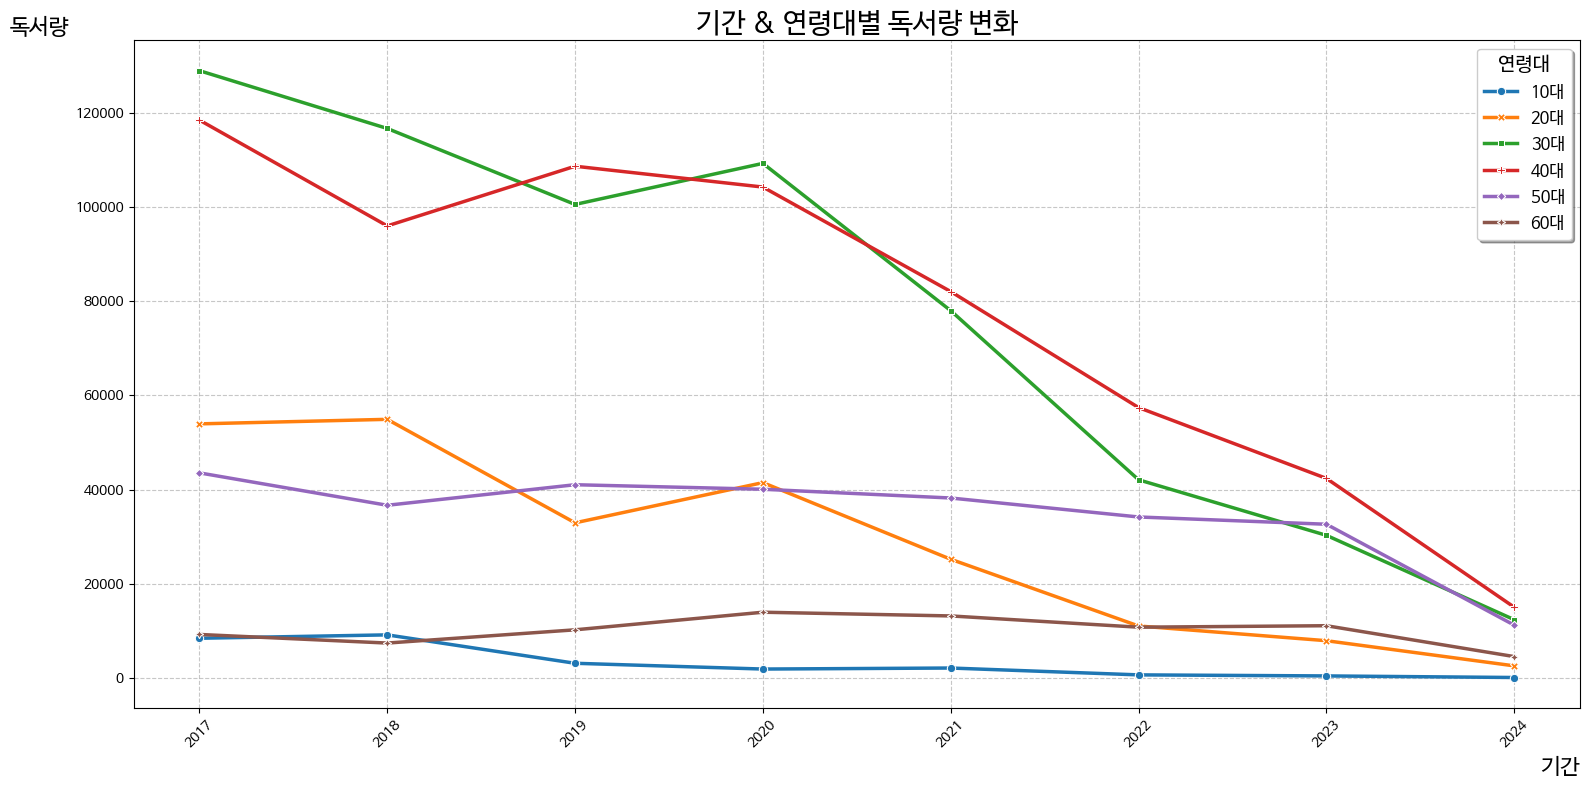

In [ ]:
date_sales_age = filtered_df.groupby(['Year', 'Age'])['Sales'].sum().reset_index()

# 기간별 독서량 변화
plt.figure(figsize=(16, 8))
sns.lineplot(data=date_sales_age, x='Year', y='Sales', hue='Age', style='Age', markers=True, palette='tab10',
             linewidth=2.5, dashes=False)

plt.title('기간 & 연령대별 독서량 변화', fontsize=20, weight='bold')
plt.xlabel('기간', fontsize=16, loc='right', weight='bold')
plt.ylabel('독서량', fontsize=16, rotation=0, loc='top', weight='bold')
plt.legend(title='연령대', title_fontsize=14, loc='upper right', fontsize=12, frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(date_sales_age['Year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

####3-2 연령대별 독서량 변화

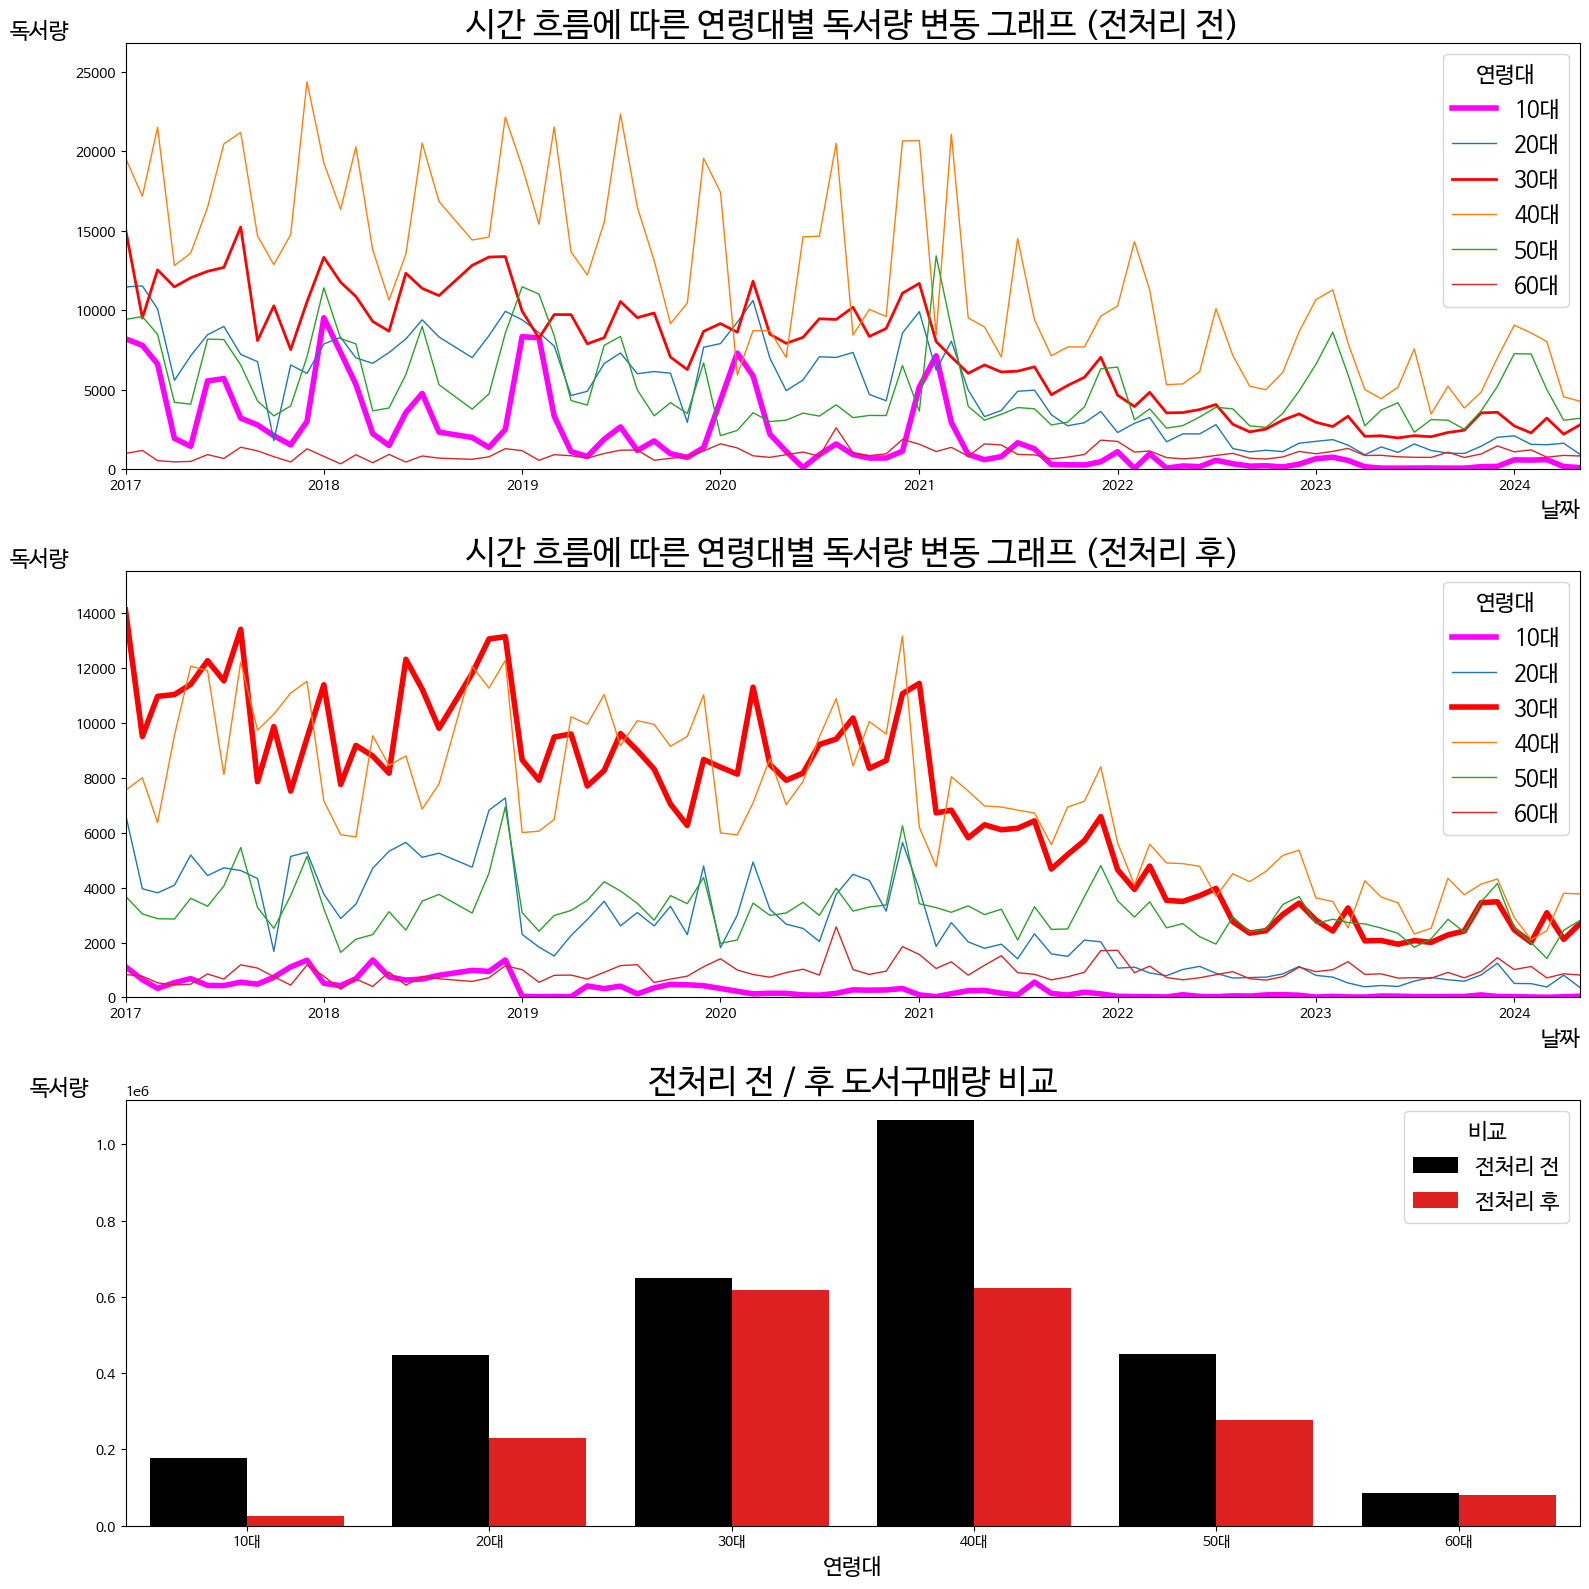

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연도별 책 판매량을 연령대별로 그룹화
dately_counts = df.groupby(['Date', 'Age'])['Sales'].sum().reset_index()
filtered_dately_counts = filtered_df.groupby(['Date', 'Age'])['Sales'].sum().reset_index()

# 전처리 전 데이터의 연령대별 총 도서구매량 계산
age_sales_before = df.groupby('Age')['Sales'].sum().reset_index()
age_sales_before['Status'] = '전처리 전'

# 전처리 후 데이터의 연령대별 총 도서구매량 계산
age_sales_after = filtered_dately_counts.groupby('Age')['Sales'].sum().reset_index()
age_sales_after['Status'] = '전처리 후'

# 전처리 전과 후 데이터를 하나의 DataFrame으로 결합
combined_sales = pd.concat([age_sales_before, age_sales_after])

# 라인 그래프 그리기
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))

# 첫 번째 그래프 (전처리 전 데이터)
for age, data in dately_counts.groupby('Age'):
    if age == '10대':
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax1, label=f'{age}', linewidth=4, color='magenta')
    elif age == '30대':
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax1, label=f'{age}', linewidth=2, color='red')
    else:
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax1, label=f'{age}', linewidth=1)

ax1.set_title('시간 흐름에 따른 연령대별 독서량 변동 그래프 (전처리 전)', fontdict={'fontsize': 24})
ax1.set_xlabel('날짜', fontsize=16, loc='right')
ax1.set_ylabel('독서량', fontsize=16, rotation=0, loc='top')
ax1.legend(title='연령대', title_fontsize=16, loc='upper right', fontsize=16)
ax1.set_xlim(dately_counts['Date'].min(), dately_counts['Date'].max())
ax1.set_ylim(0, dately_counts['Sales'].max() * 1.1)

# 두 번째 그래프 (전처리 후 데이터)
for age, data in filtered_dately_counts.groupby('Age'):
    if age == '10대':
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax2, label=f'{age}', linewidth=4, color='magenta')
    elif age == '30대':
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax2, label=f'{age}', linewidth=4, color='red')
    else:
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax2, label=f'{age}', linewidth=1)

ax2.set_title('시간 흐름에 따른 연령대별 독서량 변동 그래프 (전처리 후)', fontdict={'fontsize': 24})
ax2.set_xlabel('날짜', fontsize=16, loc='right')
ax2.set_ylabel('독서량', fontsize=16, rotation=0, loc='top')
ax2.legend(title='연령대', title_fontsize=16, loc='upper right', fontsize=16)
ax2.set_xlim(filtered_dately_counts['Date'].min(), filtered_dately_counts['Date'].max())
ax2.set_ylim(0, filtered_dately_counts['Sales'].max() * 1.1)

# 세 번째 그래프 (전처리 전과 후 연령대별 도서구매량 비교)
custom_palette = ['black', 'red']
sns.barplot(data=combined_sales, x='Age', y='Sales', hue='Status', palette=custom_palette)

ax3.set_title('전처리 전 / 후 도서구매량 비교', fontsize=24)
ax3.set_xlabel('연령대', fontsize=16)
ax3.set_ylabel('독서량', fontsize=16, rotation=0, loc='top')
ax3.legend(title='비교', title_fontsize=16, fontsize=16)

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

# 연령대 독서량 변화 시각화 : 전처리 적용 전/후 비교 결과
### 연령층 중 10대, 30대, 40대 유의미한 변화 확인 가능
 - 10대
  - 전처리 전 : 연초에 집중된 도서구매량 분포를 확인할 수 있습니다. 그로인해 학기가 시작하는 시기에 집중되있음을 예측할 수 있습니다.
  - 전처리 후 : 학습도서를 전처리한 결과 학기초에 집중된 도서구매량이 급락한 모습을 그래프를 통해 확인할 수 있습니다. 그로인해 10대의 독서량이 순위가 하락한 모습 또한 확인할 수 있습니다.
 - 30대
  - 교육, 전문지식등 목적에 부합되지 않는 도서를 전처리한 결과 가장 독서를 위한 도서 구매 활동에 가장 활발한 연령대가 30대 라는 것을 확인할 수 있었습니다. 전처리를 진행하여 목표에 부합되지 않는 도서 카테고리를 제거하며 모든 연령대가 도서 구매량이 감소하는 상황 속에서 감소량이 가장 적으며 상대적으로 그래프 곡선이 상향된 것 을 확인할 수 있습니다.

 - 40대
  - 40대 연령층은 전처리 전 가장 많은 도서구매량을 확인할 수 있으나, 전처리 후 가장 큰 감소량을 보였습니다. 이로인해 40대가 구매하는 도서종류가 전처리한 학습도서가 의외로 20대보다 많은 비중을 차지한다는 사실을 확인할 수 있었습니다.

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15621 entries, 10 to 23898
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Publisher  15621 non-null  object        
 1   Category   15621 non-null  object        
 2   Title      15621 non-null  object        
 3   Sales      15621 non-null  int64         
 4   Year       15621 non-null  int64         
 5   Month      15621 non-null  int64         
 6   Age        15621 non-null  object        
 7   Date       15621 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.1+ MB


# 시간 흐름에 따른 도서구매량(기준:년도)
 - 사회적인 이슈가 되고있는 독서량 감소를 확인하기 위해 전체적인 동향을 확인하기 위해 연도로 시각화한 결과 2017년부터 2024년의 기간동안 전반적으로 우하향 곡선을 그리며 독서량이 떨어지고 있다는걸 확인할 수 있습니다.
 다만 2019~2021년도에 하향 곡선의 기울기가 떨어지거나, 반대로 상승하는걸 확인할 수 있습니다. 이는 당시 세계적인 빅이슈였던 코로나로 인한 대책으로 '사회적 거리두기'로 인한 일상 변화에 따른 낙수효과로 분석할 수 있습니다.

# 4. [10대 20대 30대 40대 50대 60대] 인기있는 카테고리(17.01 - 24.06) pie chart (6x2) subplot


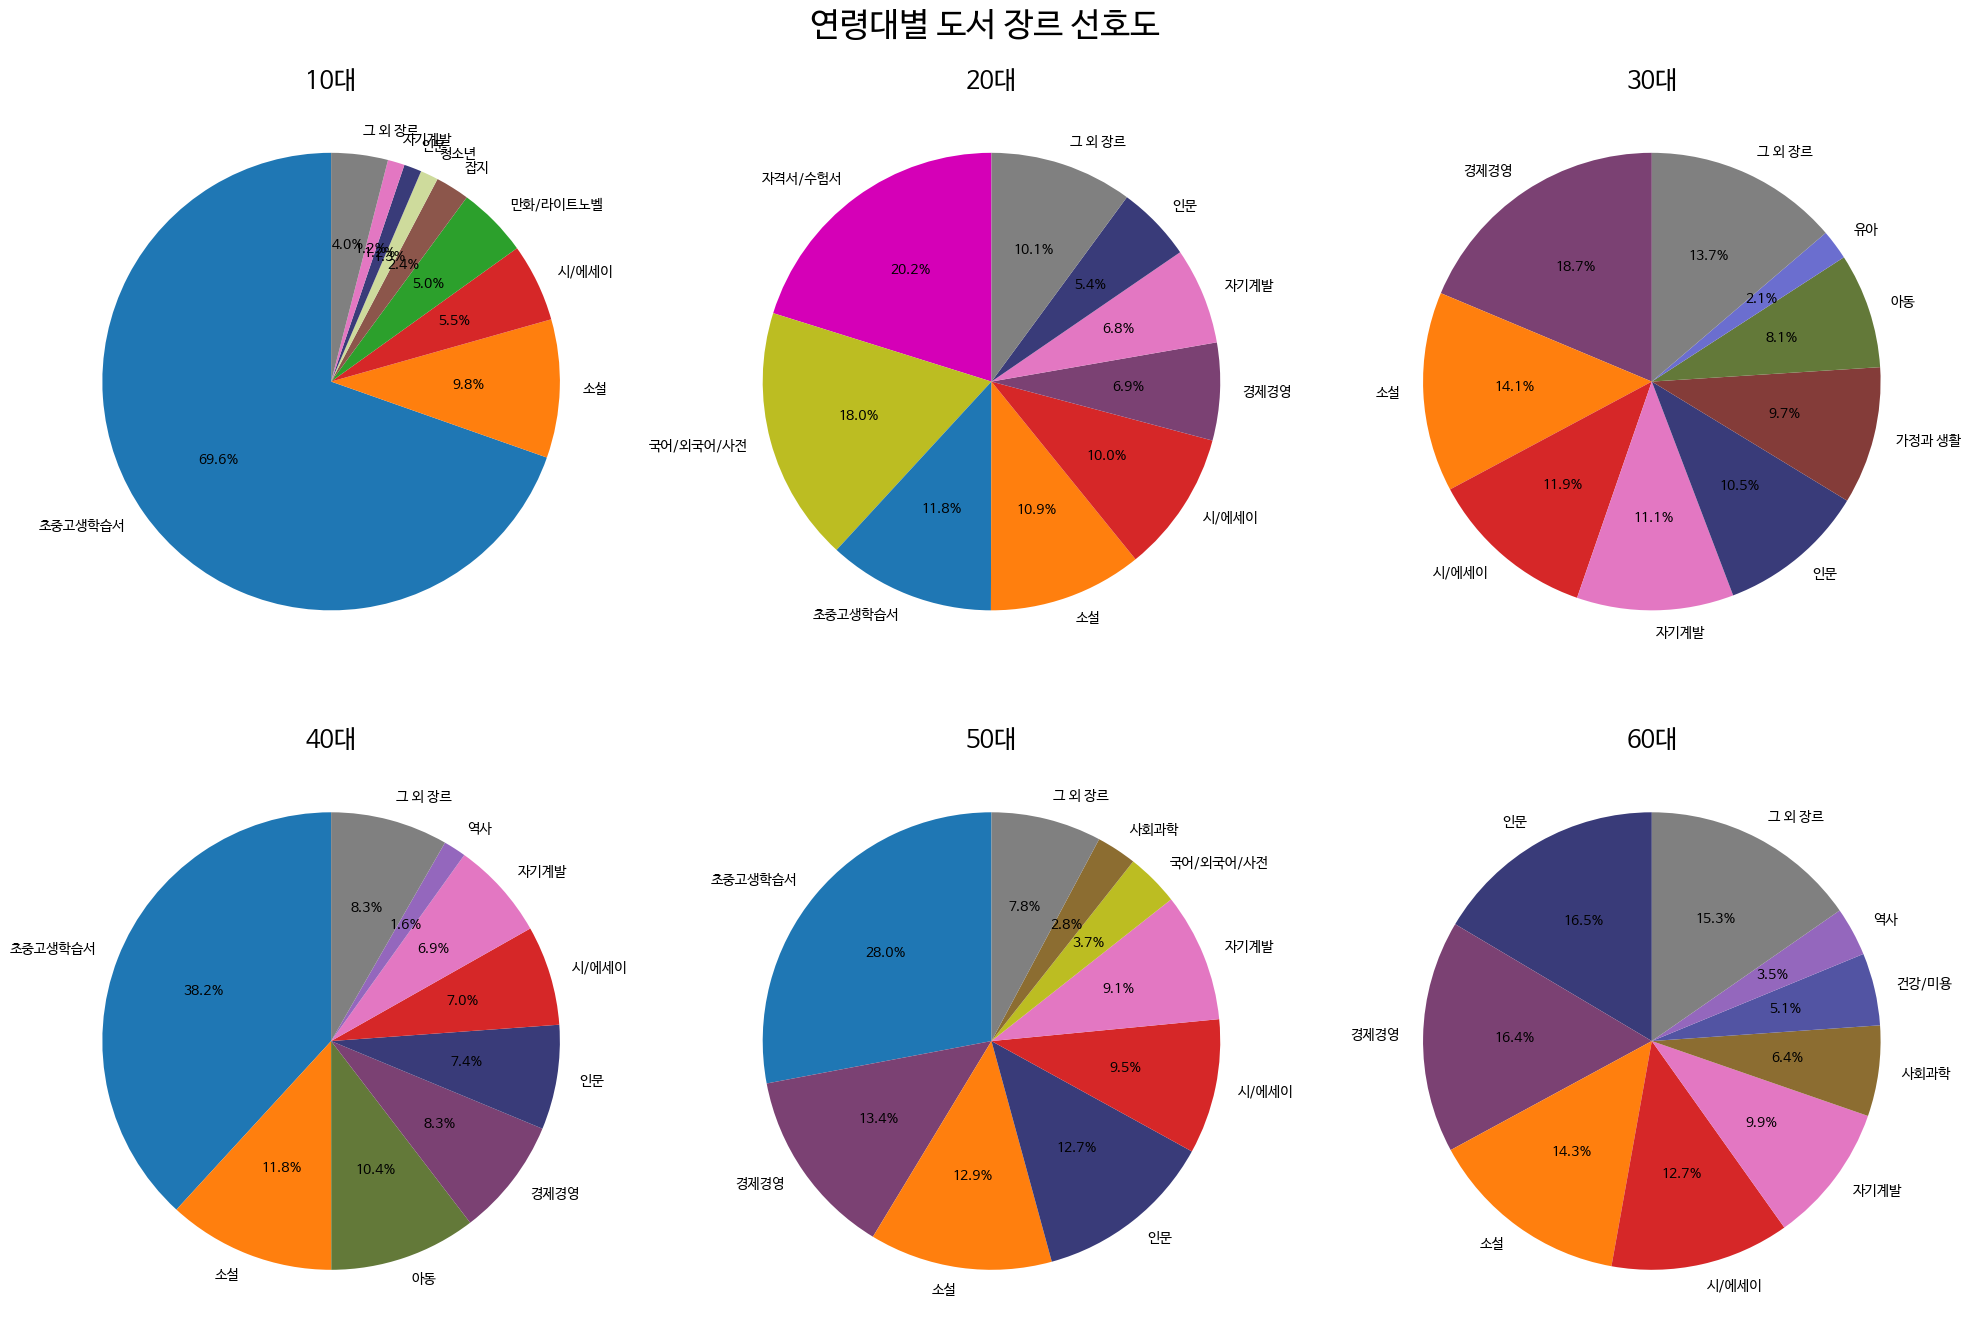

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


age_groups = df['Age'].unique()

# 진한 색상의 커스텀 리스트
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
    '#D500B7', '#bcbd22', '#17becf', '#393b79', '#637939', '#8c6d31', '#843c39',
    '#7b4173', '#5254a3', '#6b6ecf', '#9c9ede', '#cedb9c', '#e7ba52'
]
# 모든 카테고리 추출 및 색상 맵 생성
all_categories = df['Category'].unique()
color_map = dict(zip(all_categories, custom_colors[:len(all_categories)]))
color_map['그 외 장르'] = '#808080'  # 그 외 장르는 회색으로 설정

fig, axes = plt.subplots(2, 3, figsize=(20, 14))

for i, age_label in enumerate(age_groups):
    row, col = divmod(i, 3)

    # 해당 연령대의 카테고리 선호도 계산
    preferences = df[df['Age'] == age_label]['Category'].value_counts()

    if preferences.empty:
        axes[row, col].set_title(f'{age_label} Preferences (No Data)', size=14)
        continue

    # 상위 8개 카테고리 선택 및 나머지를 '그 외 장르'로 묶기
    top_8 = preferences.nlargest(8)
    others = pd.Series({'그 외 장르': preferences.sum() - top_8.sum()})
    plot_data = pd.concat([top_8, others])

    # 색상 리스트 생성
    colors = [color_map.get(cat, '#808080') for cat in plot_data.index]

    # 파이 차트 그리기
    wedges, texts, autotexts = axes[row, col].pie(plot_data, labels=plot_data.index, autopct='%1.1f%%',
                                                  startangle=90, colors=colors)

    # 레이블 텍스트 크기 조정
    plt.setp(texts, size=10)
    plt.setp(autotexts, size=10, weight="bold")

    axes[row, col].set_title(f'{age_label}', size=18)

plt.suptitle('연령대별 도서 장르 선호도', size=24)
plt.tight_layout()
plt.show()

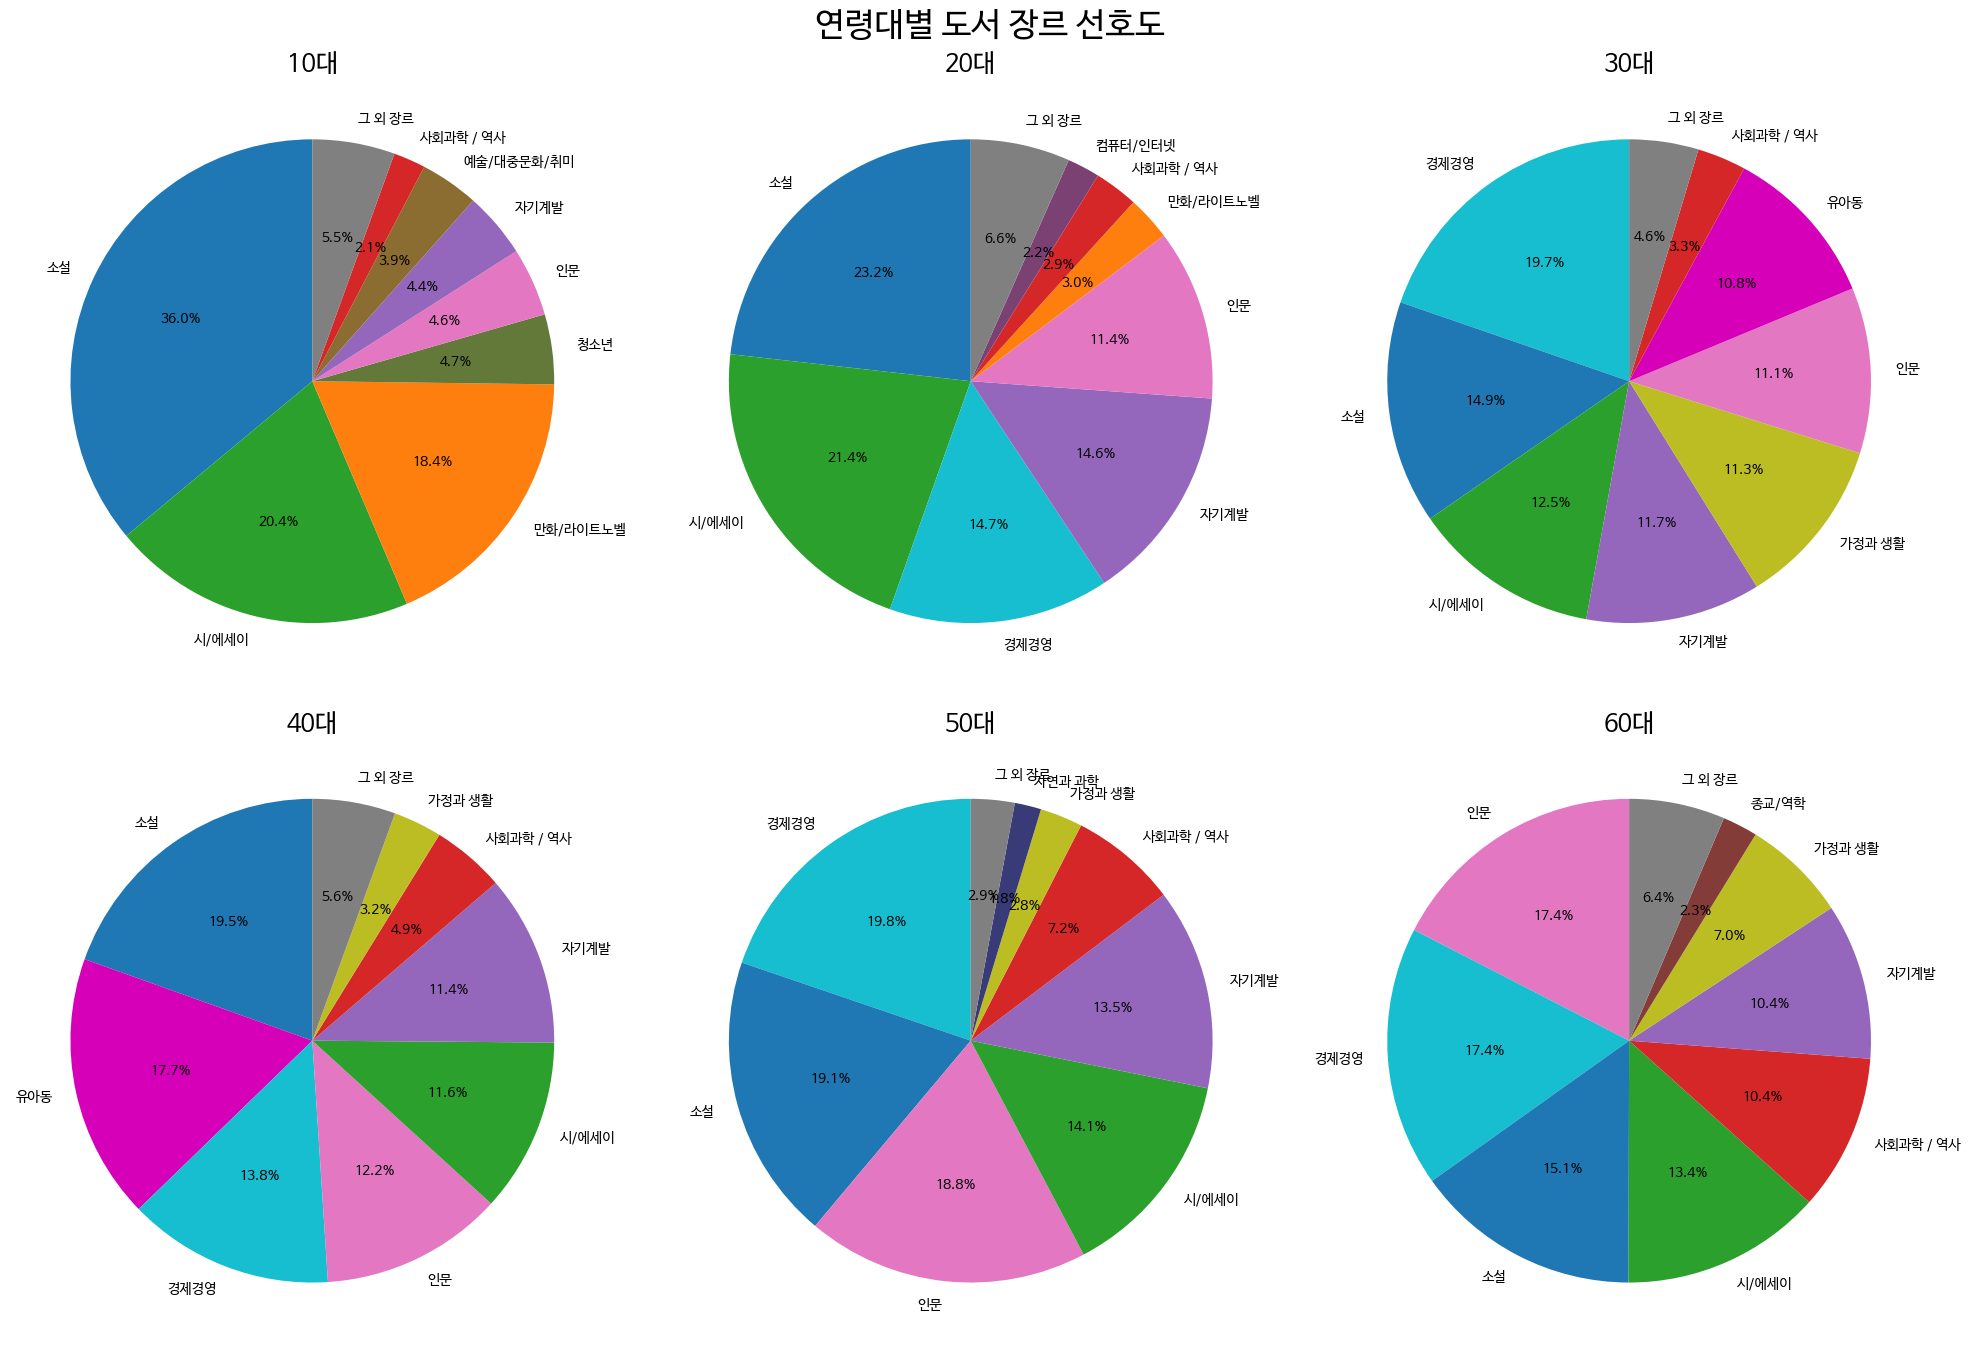

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


age_groups = filtered_df['Age'].unique()

# 진한 색상의 커스텀 리스트
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
    '#D500B7', '#bcbd22', '#17becf', '#393b79', '#637939', '#8c6d31', '#843c39',
    '#7b4173', '#5254a3', '#6b6ecf', '#9c9ede', '#cedb9c', '#e7ba52'
]
# 모든 카테고리 추출 및 색상 맵 생성
all_categories = filtered_df['Category'].unique()
color_map = dict(zip(all_categories, custom_colors[:len(all_categories)]))
color_map['그 외 장르'] = '#808080'  # 그 외 장르는 회색으로 설정

fig, axes = plt.subplots(2, 3, figsize=(20, 14))

for i, age_label in enumerate(age_groups):
    row, col = divmod(i, 3)

    # 해당 연령대의 카테고리 선호도 계산
    preferences = filtered_df[filtered_df['Age'] == age_label]['Category'].value_counts()

    if preferences.empty:
        axes[row, col].set_title(f'{age_label} Preferences (No Data)', size=14)
        continue

    # 상위 8개 카테고리 선택 및 나머지를 '그 외 장르'로 묶기
    top_8 = preferences.nlargest(8)
    others = pd.Series({'그 외 장르': preferences.sum() - top_8.sum()})
    plot_data = pd.concat([top_8, others])

    # 색상 리스트 생성
    colors = [color_map.get(cat, '#808080') for cat in plot_data.index]

    # 파이 차트 그리기
    wedges, texts, autotexts = axes[row, col].pie(plot_data, labels=plot_data.index, autopct='%1.1f%%',
                                                  startangle=90, colors=colors)

    # 레이블 텍스트 크기 조정
    plt.setp(texts, size=10)
    plt.setp(autotexts, size=10, weight="bold")

    axes[row, col].set_title(f'{age_label}', size=18)

plt.suptitle('연령대별 도서 장르 선호도', size=24)
plt.tight_layout()
plt.show()

# 5. 시간의 흐름에 따른 독서 분야 추세 (꺾은 선 그래프 (6x2) subplot(?))
 - x: 시간, y: Sales.sum(), elements: Category10

<ipython-input-230-5d49c70a0b56>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_sales_category['Date'] = pd.to_datetime(date_sales_category['Date'])


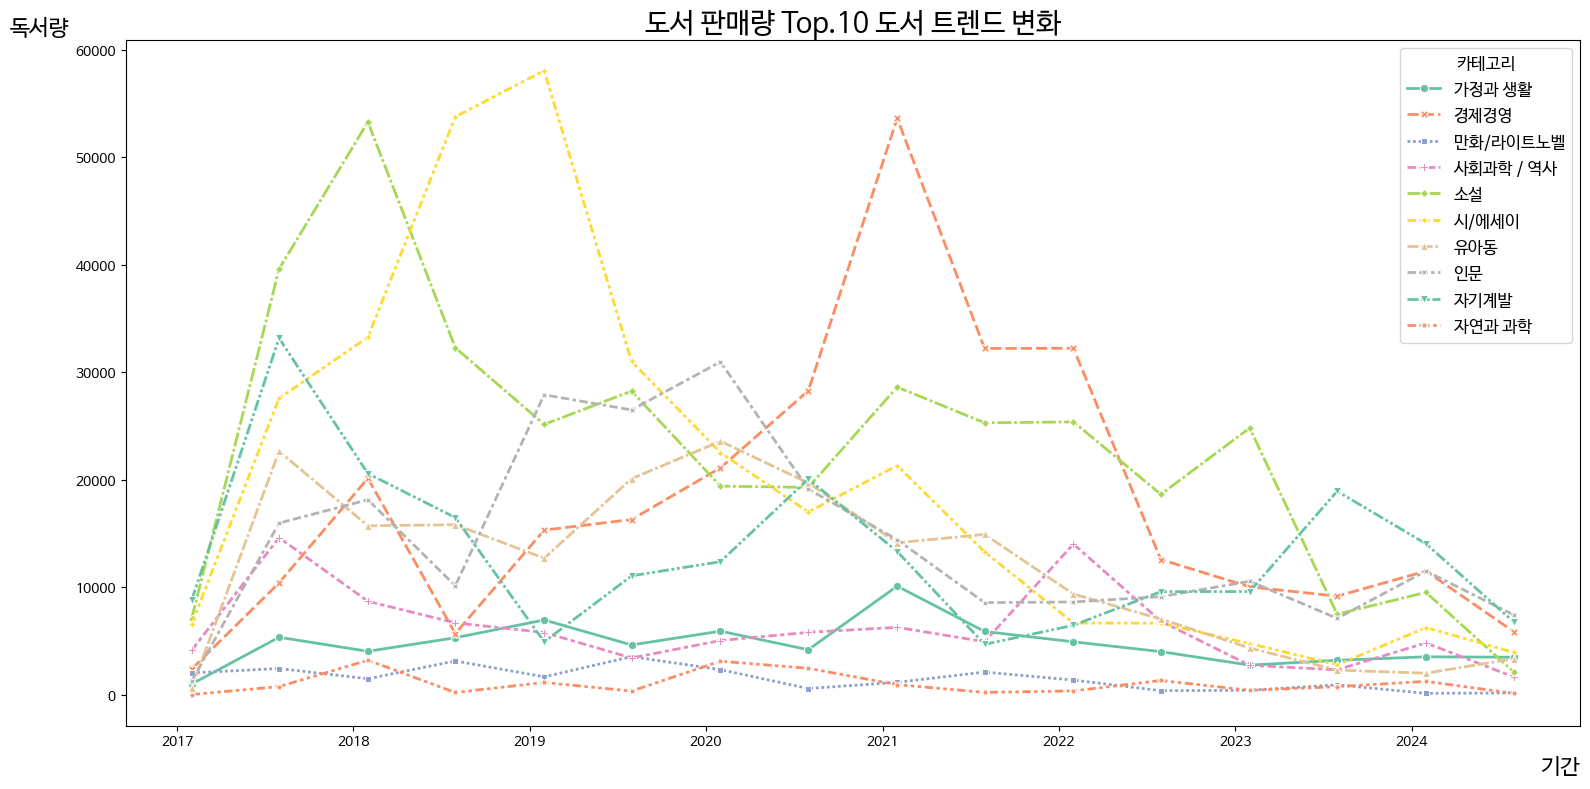

In [ ]:
category_top10 = filtered_df['Category'].value_counts().head(10).index

# 상위 10개 카테고리에 해당하는 데이터 필터링
date_sales_category = filtered_df[filtered_df['Category'].isin(category_top10)]

# Month 칼럼을 활용하여 6개월 단위로 집계
date_sales_category['Date'] = pd.to_datetime(date_sales_category['Date'])
date_sales_category = date_sales_category.set_index('Date').groupby('Category').resample('6M')['Sales'].sum().reset_index()

# 연도별 상위 10개 카테고리별 독서 구매량
plt.figure(figsize=(16, 8))
sns.lineplot(data=date_sales_category, x='Date', y='Sales', hue='Category', style='Category', markers=True, palette='Set2',
             linewidth=2)
plt.title('도서 판매량 Top.10 도서 트렌드 변화', fontsize=20)
plt.xlabel('기간', fontsize=16, loc='right')
plt.ylabel('독서량', fontsize=16, rotation=0, loc='top')
plt.legend(title='카테고리', title_fontsize=12, loc='upper right', fontsize=12)
plt.grid(False)

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

# 도서 트렌드 변화 확인
 - 시간 흐름에 따른 도서 종류의 트렌드 변화 추이를 확인할 수 있습니다.
  - 2019년도부터 2021년도 경제.경영 분야에 대한 도서 구매량이 폭증한 것을 확인할 수 있습니다. 이는 코로나 여파로 폭락했던 경제위기 상황을 타계하고 경기를 부양하기 위한 경제정책의 영향으로 주식에 대한 투자 열풍이 불기 시작하며 사회적인 관심이 경제분야 집중된 영향이 도서 출판 분야에도 영향을 미친 것으로 분석할 수 있습니다.

# 이후 개선하거나 업그레이드 가능한 항목

- 추출한 데이터셋이 비연속적인 무의미한 데이터가 아닌 같은 연 같은 월에 한해서는 0번 인덱스부터 49번 인덱스까지 1위 ~ 50위 인 점을 이용해
 - grouped_df = df.groupby(['Year', 'Month]) ~~~
 - grouped_df.iloc[:50]
 - 를 이용하면 유의미한 데이터를 뽑을 수도 있을것같음.

- 예스24 카테고리별 총 평균 평점
 - 출판사한테 어떤 유형의 책을 출간할지 추천하는 부분에서 하는 작업
 - 그래프 간단하게 보여주면서 이런 분야의 책들은 좀 호불호가 있을 수 있다.